#### Using the Chicago Crime Dataset(any of the 3 sheets you choose), perfrom the following data preparation steps:
1. Use a funtion to Drop redundant columns (a redundant colum is one that gives infromation that another column already explains: eg ID and Case number) 
2. Use functions to create new columns for Months, Day, Season.
3. Use subsetting and grouping to show how the frequency of crime is distributed within Months, Days, Seasons with the most crime record and what crimes are highest and lowest?
4.  According to location description, where does crime hapen the most?
5.  Did the Types of crime change as years go by? if yes/no. let the data show the insight.

In [233]:
# import the necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
# load the chicago crime data
chicago2_df = pd.read_csv('chicago2.csv')
chicago2_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,53000,4809324,HM300447,04/19/2006 04:45:02 PM,090XX S NORMAL AVE,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,False,...,21.0,71.0,18,1174545.0,1845186.0,2006,02/10/2018 03:50:01 PM,41.730582,-87.636172,"(41.730582057, -87.636172403)"
1,53001,2599849,HJ197748,02/21/2003 06:30:00 PM,039XX N AVONDALE AVE,0820,THEFT,$500 AND UNDER,STREET,False,...,38.0,16.0,06,1147850.0,1926182.0,2003,02/28/2018 03:56:25 PM,41.953398,-87.731888,"(41.953397577, -87.73188822)"
2,53002,7495181,HR183541,02/22/2009 07:42:00 PM,011XX S CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,OTHER,False,...,28.0,29.0,08B,NaN,NaN,2009,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,53003,2628412,HJ231141,03/07/2003 02:46:00 PM,025XX W ADDISON ST,0890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",False,...,47.0,5.0,06,1158854.0,1923830.0,2003,02/28/2018 03:56:25 PM,41.946725,-87.691501,"(41.946724511, -87.691501175)"
4,53004,8389615,HT622350,12/06/2011 12:00:00 AM,072XX S MAY ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,...,17.0,68.0,26,1169905.0,1856761.0,2011,02/04/2016 06:33:39 AM,41.762447,-87.652835,"(41.762447305, -87.652834901)"


In [235]:
# use .info to take a quick peek into our data
chicago2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1000 non-null   int64  
 1   ID                    1000 non-null   int64  
 2   Case Number           1000 non-null   object 
 3   Date                  1000 non-null   object 
 4   Block                 1000 non-null   object 
 5   IUCR                  1000 non-null   object 
 6   Primary Type          1000 non-null   object 
 7   Description           1000 non-null   object 
 8   Location Description  999 non-null    object 
 9   Arrest                1000 non-null   bool   
 10  Domestic              1000 non-null   bool   
 11  Beat                  1000 non-null   int64  
 12  District              1000 non-null   float64
 13  Ward                  929 non-null    float64
 14  Community Area        929 non-null    float64
 15  FBI Code              

## 1. Use a funtion to Drop redundant columns (a redundant colum is one that gives infromation that another column already explains: eg ID and Case number)

In [236]:
# write a function that drops column we wont need
def drop_column(data, *args):
    d = data.drop([*args], axis= 1, inplace= True)
    return d

In [237]:
# use the function to drop the id, unnamed etc. columns
drop_column(chicago2_df, 'ID', 'Unnamed: 0', 'X Coordinate', 'Y Coordinate', 'Location', 'Longitude','Latitude')

In [238]:
# print the df to see if the changes were made
chicago2_df.head(3)

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On
0,HM300447,04/19/2006 04:45:02 PM,090XX S NORMAL AVE,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,False,False,2223,22.0,21.0,71.0,18,2006,02/10/2018 03:50:01 PM
1,HJ197748,02/21/2003 06:30:00 PM,039XX N AVONDALE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,1731,17.0,38.0,16.0,06,2003,02/28/2018 03:56:25 PM
2,HR183541,02/22/2009 07:42:00 PM,011XX S CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,OTHER,False,False,1135,11.0,28.0,29.0,08B,2009,08/17/2015 03:03:40 PM


In [239]:
chicago2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Case Number           1000 non-null   object 
 1   Date                  1000 non-null   object 
 2   Block                 1000 non-null   object 
 3   IUCR                  1000 non-null   object 
 4   Primary Type          1000 non-null   object 
 5   Description           1000 non-null   object 
 6   Location Description  999 non-null    object 
 7   Arrest                1000 non-null   bool   
 8   Domestic              1000 non-null   bool   
 9   Beat                  1000 non-null   int64  
 10  District              1000 non-null   float64
 11  Ward                  929 non-null    float64
 12  Community Area        929 non-null    float64
 13  FBI Code              1000 non-null   object 
 14  Year                  1000 non-null   int64  
 15  Updated On            

## 2. Use functions to create new columns for Months, Day, Season.


In [240]:
from datetime import datetime

# define a function that extracts the month from the date column and returns the month names

def extract_and_create_monthC(data):
    '''ensure the input is in datetime format - 07/26/2008 02:30:00 PM,
    extracts the month from the date columns and returns a new column of months'''
    to_date_structure = pd.to_datetime(data, format= '%m/%d/%Y %I:%M:%S %p')
    
    month_names = to_date_structure.dt.month_name()
    
    return month_names
    

In [241]:
# create a month column using the month function
chicago2_df['Months'] = extract_and_create_monthC(chicago2_df['Date'])

In [242]:
# deffine a function that extracts the day from the date column and returns the day names
def extract_and_create_dayC(data):
    '''ensure the input is in datetime format - 07/26/2008 02:30:00 PM,
    extracts the day from the date columns and reurns a new column of days'''
    to_date_structure = pd.to_datetime(data, format= '%m/%d/%Y %I:%M:%S %p')
    
    Day_names = to_date_structure.dt.day_name()
    
    return Day_names
    

In [243]:
# create the day column using the function
chicago2_df['Day'] = extract_and_create_dayC(chicago2_df['Date'])

In [244]:
# deffine a function that extracts the month from the date column,maps the season to it and returns the seasons names
def extract_and_create_SeasonsC(data):
    '''ensure the input is in datetime format - 07/26/2008 02:30:00 PM and
    maps season to the month after extracting the month from the month columns'''
    to_date_structure = pd.to_datetime(data, format= '%m/%d/%Y %I:%M:%S %p')
    
    month = to_date_structure.dt.month
    
    seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 
               6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
    season_names = month.map(seasons)
    
    return season_names

In [245]:
# create a new column for the seasons using he seasons function
chicago2_df['Seasons'] = extract_and_create_SeasonsC(chicago2_df['Date'])

In [246]:
# print few rows to confirm if the colums were created.
chicago2_df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Months,Day,Seasons
0,HM300447,04/19/2006 04:45:02 PM,090XX S NORMAL AVE,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,False,False,2223,22.0,21.0,71.0,18,2006,02/10/2018 03:50:01 PM,April,Wednesday,Spring
1,HJ197748,02/21/2003 06:30:00 PM,039XX N AVONDALE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,1731,17.0,38.0,16.0,06,2003,02/28/2018 03:56:25 PM,February,Friday,Winter
2,HR183541,02/22/2009 07:42:00 PM,011XX S CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,OTHER,False,False,1135,11.0,28.0,29.0,08B,2009,08/17/2015 03:03:40 PM,February,Sunday,Winter
3,HJ231141,03/07/2003 02:46:00 PM,025XX W ADDISON ST,0890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",False,False,1913,19.0,47.0,5.0,06,2003,02/28/2018 03:56:25 PM,March,Friday,Spring
4,HT622350,12/06/2011 12:00:00 AM,072XX S MAY ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,733,7.0,17.0,68.0,26,2011,02/04/2016 06:33:39 AM,December,Tuesday,Winter


In [247]:
# Checking to ensure the seasons are mapped correctly to the months
chicago2_df.groupby('Months')['Seasons'].unique()

Months
April        [Spring]
August       [Summer]
December     [Winter]
February     [Winter]
January      [Winter]
July         [Summer]
June         [Summer]
March        [Spring]
May          [Spring]
November       [Fall]
October        [Fall]
September      [Fall]
Name: Seasons, dtype: object

## 3. Use subsetting and grouping to show how the frequency of crime is distributed within Months, Days, Seasons with the most crime record and what crimes are highest and lowest?

### 3a. Which Month has the highest and lowest crime rate?

In [248]:
crime_by_month = chicago2_df.groupby('Months')['Primary Type'].count().sort_values(ascending = False)
crime_by_month

Months
July         96
April        94
October      93
March        90
May          87
September    87
January      79
August       77
December     76
June         76
November     76
February     69
Name: Primary Type, dtype: int64

In [249]:
print(f"The month with the highest crime rate is: {crime_by_month.idxmax()}")
print(f"The month with the lowest crime rate is: {crime_by_month.idxmin()}")

The month with the highest crime rate is: July
The month with the lowest crime rate is: February


###  Insight:
From the result of the analysis, we see that the month with the highest crime rate is July while the month with the lowest crime occurence is February

### 3b. Which Day has the highest and lowest crime rate?

In [250]:
crime_by_day = chicago2_df.groupby('Day')['Primary Type'].count().sort_values(ascending = False)
crime_by_day

Day
Monday       169
Wednesday    147
Saturday     143
Sunday       139
Friday       135
Tuesday      134
Thursday     133
Name: Primary Type, dtype: int64

In [251]:
print(f"The day with the highest crime rate is: {crime_by_day.idxmax()}")
print(f"The day with the lowest crime rate is: {crime_by_day.idxmin()}")

The day with the highest crime rate is: Monday
The day with the lowest crime rate is: Thursday


###  Insight:
From the result of the analysis, we see that the days in which crime occured the most is Mondays  while the day with the lowest crime occurence is Thursdays. 

### 3c. Which Season has the highest and lowest crime rate?

In [252]:
crime_by_seasons = chicago2_df.groupby('Seasons')['Primary Type'].count().sort_values(ascending = False)
crime_by_seasons

Seasons
Spring    271
Fall      256
Summer    249
Winter    224
Name: Primary Type, dtype: int64

In [253]:
print(f"The day with the highest crime rate is: {crime_by_seasons.idxmax()}")
print(f"The day with the lowest crime rate is: {crime_by_seasons.idxmin()}")

The day with the highest crime rate is: Spring
The day with the lowest crime rate is: Winter


### Insight:
From the result of the analysis, we can see that crimes occured mostly in the Spring season while lesser crime occured during the Winter season.

### 3d. Which Type of crime has the highest and lowest rate?

In [254]:
crime_type = chicago2_df.groupby('Primary Type')['Months'].count()
crime_type

Primary Type
ASSAULT                              54
BATTERY                             187
BURGLARY                             62
CRIM SEXUAL ASSAULT                   1
CRIMINAL DAMAGE                     103
CRIMINAL TRESPASS                    31
DECEPTIVE PRACTICE                   54
GAMBLING                              2
HOMICIDE                              2
INTERFERENCE WITH PUBLIC OFFICER      4
INTIMIDATION                          2
KIDNAPPING                            2
LIQUOR LAW VIOLATION                  1
MOTOR VEHICLE THEFT                  48
NARCOTICS                            93
OFFENSE INVOLVING CHILDREN           10
OTHER OFFENSE                        69
PROSTITUTION                          8
PUBLIC PEACE VIOLATION                4
ROBBERY                              44
SEX OFFENSE                           4
STALKING                              1
THEFT                               206
WEAPONS VIOLATION                     8
Name: Months, dtype: int64

In [255]:
print(f'The highest crime type is: {crime_type.idxmax()}')
print(f'The lowest crime type is: {crime_type.idxmin()}')

The highest crime type is: THEFT
The lowest crime type is: CRIM SEXUAL ASSAULT


Text(0, 0.5, 'Number of Crime')

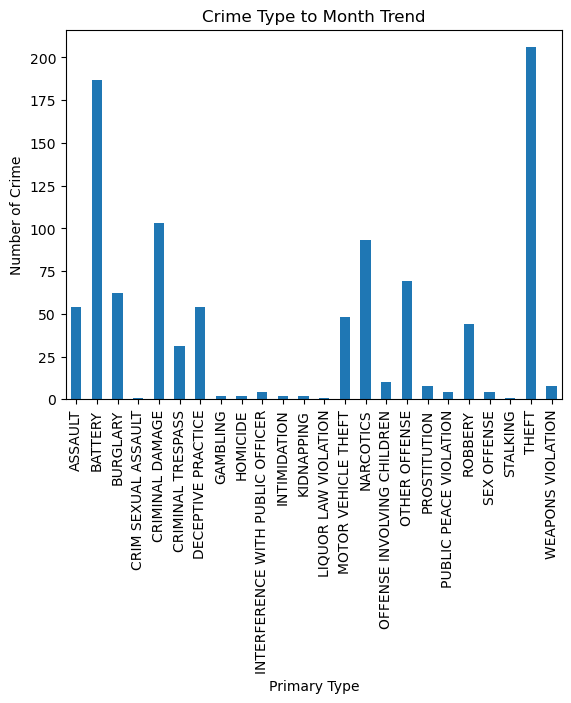

In [256]:
crime_type.plot(kind = 'bar')
plt.title('Crime Type to Month Trend')
plt.ylabel('Number of Crime')

### Insight:
Using a bar chart we see the that crime that occured the most is the Theft crime while the least crime commited is the Liquor law violation, crim sexual assault, stalking

## 4.   According to location description, where does crime hapen the most?

In [257]:
chicago2_df.groupby('Location Description')['Primary Type'].count().sort_values(ascending=False)

Location Description
STREET                                            255
RESIDENCE                                         169
APARTMENT                                         123
SIDEWALK                                           87
OTHER                                              35
                                                 ... 
POOL ROOM                                           1
OTHER RAILROAD PROP / TRAIN DEPOT                   1
AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA      1
HIGHWAY/EXPRESSWAY                                  1
ABANDONED BUILDING                                  1
Name: Primary Type, Length: 61, dtype: int64

### Insight:
From the result, the location where crimes happens the most is on the Street.

In [258]:
chicago2_df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Months,Day,Seasons
0,HM300447,04/19/2006 04:45:02 PM,090XX S NORMAL AVE,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,False,False,2223,22.0,21.0,71.0,18,2006,02/10/2018 03:50:01 PM,April,Wednesday,Spring
1,HJ197748,02/21/2003 06:30:00 PM,039XX N AVONDALE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,1731,17.0,38.0,16.0,06,2003,02/28/2018 03:56:25 PM,February,Friday,Winter
2,HR183541,02/22/2009 07:42:00 PM,011XX S CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,OTHER,False,False,1135,11.0,28.0,29.0,08B,2009,08/17/2015 03:03:40 PM,February,Sunday,Winter
3,HJ231141,03/07/2003 02:46:00 PM,025XX W ADDISON ST,0890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",False,False,1913,19.0,47.0,5.0,06,2003,02/28/2018 03:56:25 PM,March,Friday,Spring
4,HT622350,12/06/2011 12:00:00 AM,072XX S MAY ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,733,7.0,17.0,68.0,26,2011,02/04/2016 06:33:39 AM,December,Tuesday,Winter


## 5.  Did the Types of crime change as years go by? if yes/no. let the data show the insight.

In [259]:
crime_by_year = chicago2_df[['Primary Type','Year']].value_counts().reset_index()
crime_by_year

,Primary Type,Year,count
0,THEFT,2005,20
1,THEFT,2012,18
2,BATTERY,2004,17
3,THEFT,2004,16
4,BATTERY,2001,16
...,...,...,...
255,MOTOR VEHICLE THEFT,2004,1
256,PUBLIC PEACE VIOLATION,2021,1
257,PUBLIC PEACE VIOLATION,2019,1
258,PUBLIC PEACE VIOLATION,2013,1


In [260]:
crimetype_by_year_pivot = pd.pivot_table(crime_by_year, index = 'Primary Type', columns= 'Year', 
                                         aggfunc= 'sum', fill_value=0)
crimetype_by_year_pivot

count                                     \
Year                              2001 2002 2003 2004 2005 2006 2007 2008   
Primary Type                                                                
ASSAULT                              2    4    3    4    1    1    4    2   
BATTERY                             16   13   10   17   10   10   10   12   
BURGLARY                             4    3    1    4    3    4    7    4   
CRIM SEXUAL ASSAULT                  0    0    0    0    0    0    1    0   
CRIMINAL DAMAGE                      3    9    8    7    8    2    5    6   
CRIMINAL TRESPASS                    2    1    3    2    5    2    2    2   
DECEPTIVE PRACTICE                   1    2    1    0    3    3    1    2   
GAMBLING                             0    1    0    0    0    0    0    0   
HOMICIDE                             0    0    0    0    0    0    0    0   
INTERFERENCE WITH PUBLIC OFFICER     0    0    0    0    0    0    0    0   
INTIMIDATION                         0    1    1    0    0    0    0    0   
KIDNAPPING                           0    0    0    0    1    0    0    0   
LIQUOR LAW VIOLATION                 0    0    1    0    0    0    0    0   
MOTOR VEHICLE THEFT                  3    4    6    1    1    3    3    2   
NARCOTICS                            3    3    3    5    7    8    7    8   
OFFENSE INVOLVING CHILDREN           0    2    1    1    0    0    0    2   
OTHER OFFENSE                        1    6    1    7    5    5    2    4   
PROSTITUTION                         1    0    1    2    2    0    0    0   
PUBLIC PEACE VIOLATION               0    0    0    0    0    0    0    0   
ROBBERY                              3    3    5    3    7    2    1    1   
SEX OFFENSE                          0    0    2    0    0    0    0    0   
STALKING                             0    0    0    0    0    0    0    0   
THEFT                               14    7   10   16   20   14   11    7   
WEAPONS VIOLATION                    0    0    0    1    0    1    0    0   

                                            ...                                \
Year                             2009 2010  ... 2013 2014 2015 2016 2017 2018   
Primary Type                                ...                                 
ASSAULT                             4    1  ...    3    4    2    3    2    1   
BATTERY                             8    7  ...    6    9    7    8    4    5   
BURGLARY                            4    4  ...    3    4    2    1    3    3   
CRIM SEXUAL ASSAULT                 0    0  ...    0    0    0    0    0    0   
CRIMINAL DAMAGE                     5    7  ...    6    5    3    6    3    1   
CRIMINAL TRESPASS                   1    4  ...    0    0    0    1    0    1   
DECEPTIVE PRACTICE                  1    4  ...    0    5    2    6    2    0   
GAMBLING                            0    1  ...    0    0    0    0    0    0   
HOMICIDE                            0    0  ...    0    0    0    1    0    1   
INTERFERENCE WITH PUBLIC OFFICER    0    0  ...    1    0    0    0    0    1   
INTIMIDATION                        0    0  ...    0    0    0    0    0    0   
KIDNAPPING                          0    0  ...    0    0    0    0    0    0   
LIQUOR LAW VIOLATION                0    0  ...    0    0    0    0    0    0   
MOTOR VEHICLE THEFT                 2    3  ...    1    2    3    2    0    0   
NARCOTICS                           6    8  ...    7    5    1    2    1    5   
OFFENSE INVOLVING CHILDREN          0    0  ...    1    1    0    1    0    0   
OTHER OFFENSE                       4    3  ...    3    5    4    4    4    0   
PROSTITUTION                        1    0  ...    1    0    0    0    0    0   
PUBLIC PEACE VIOLATION              1    0  ...    1    0    0    0    0    0   
ROBBERY                             2    1  ...    3    1    2    1    2    1   
SEX OFFENSE                         0    1  ...    0    0    0    0    0    0   
STALKING 

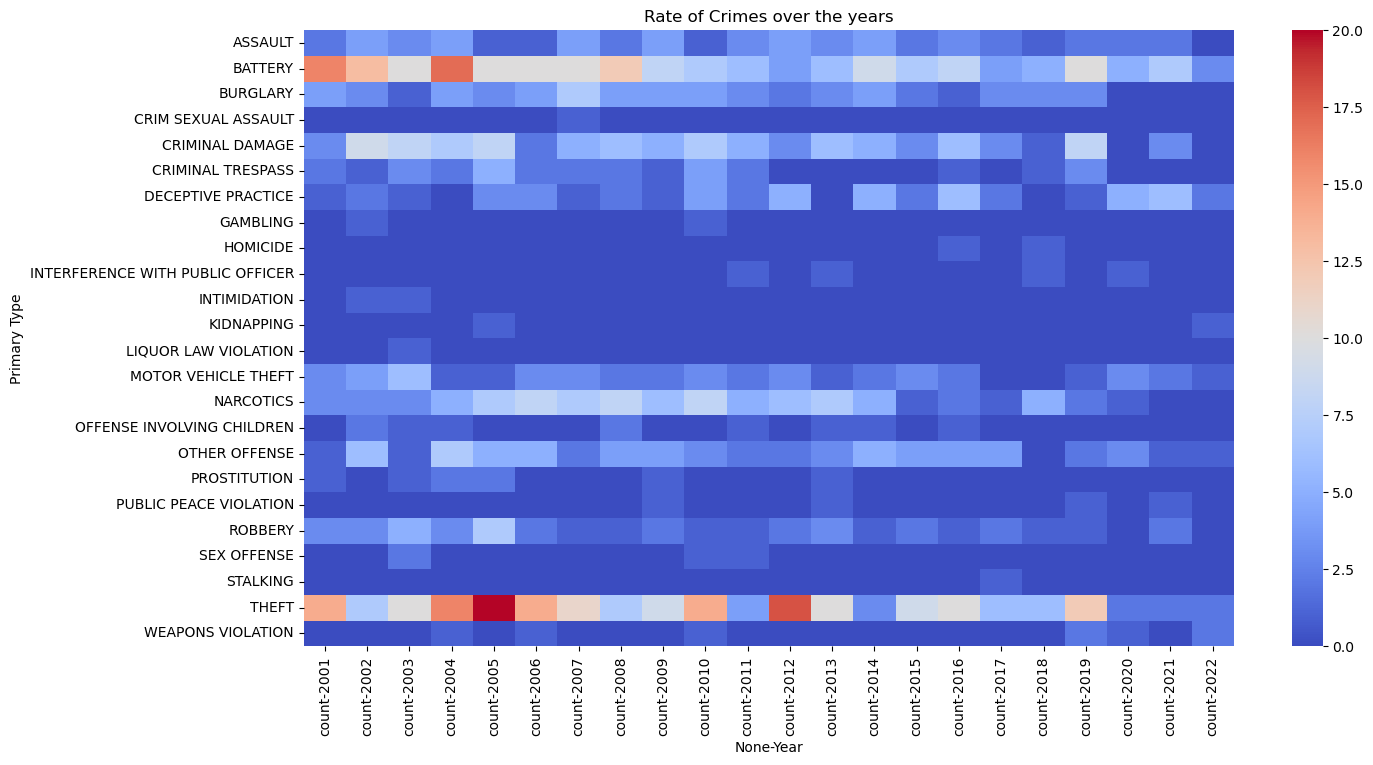

In [261]:
plt.figure(figsize= (15,8))
chart = sns.heatmap(crimetype_by_year_pivot, cmap= 'coolwarm')
chart.set_title('Rate of Crimes over the years')
plt.show()

In [262]:
crime_rate_by_year = chicago2_df.groupby('Year')['Primary Type'].count()
crime_rate_by_year

Year
2001    53
2002    59
2003    57
2004    70
2005    73
2006    55
2007    54
2008    52
2009    48
2010    59
2011    38
2012    49
2013    46
2014    44
2015    35
2016    46
2017    28
2018    25
2019    48
2020    23
2021    26
2022    12
Name: Primary Type, dtype: int64

Text(0, 0.5, 'Number of Crime')

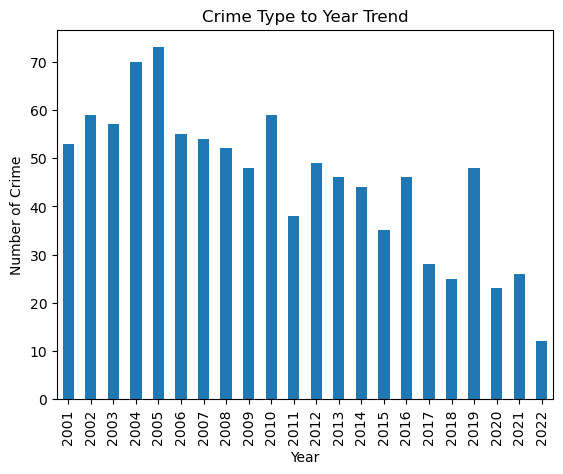

In [263]:
crime_rate_by_year.plot(kind= 'bar')
plt.title('Crime Type to Year Trend')
plt.ylabel('Number of Crime')

Text(0, 0.5, 'Number of Crime')

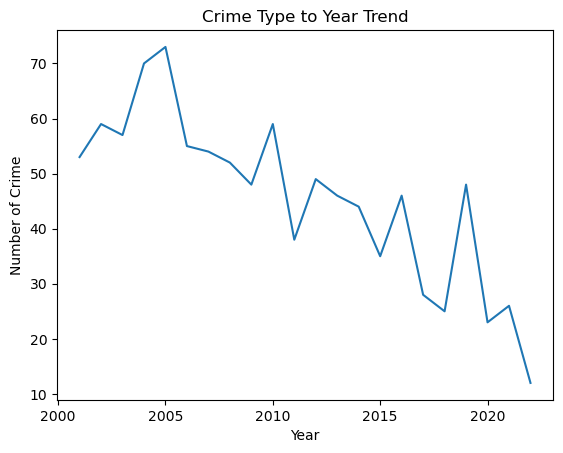

In [264]:
crime_rate_by_year.plot(kind='line')
plt.title('Crime Type to Year Trend')
plt.ylabel('Number of Crime')

# Insight:
* From the heatmap that was plot using the pivot table, we can say that crime type literally did not change over the years. The crime that occured the most like BATTERY, THEFT, etc retained that over the years and the crimes that had less occurence still maintained the less occurence over the years.

* From the bar chart and line plot we can say that generally crime rate in later years reduced when compared to the earlier years.

* Conclusively, I will say that the individual crimes retained there occurence rate as in, the crimes that occur more than the others but the strength and number of occurence reduced as the years go by.